In [2]:
train_data = np.genfromtxt("train_boston.csv",delimiter=",")
test_data = np.genfromtxt("test_boston.csv",delimiter=",")
train_data.shape,test_data.shape

((379, 14), (127, 13))

In [32]:
trainDf = pd.DataFrame(train_data)
testDf = pd.DataFrame(test_data)
trainDf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.407850,-0.487722,-1.266023,-0.272599,-0.576134,1.239974,0.840122,-0.520264,-0.752922,-1.278354,-0.303094,0.410571,-1.097990,37.9
1,-0.407374,-0.487722,0.247057,-0.272599,-1.016689,0.001946,-0.838337,0.336351,-0.523001,-0.060801,0.113032,0.291169,-0.520474,21.4
2,0.125179,-0.487722,1.015999,-0.272599,1.367490,-0.439699,0.687212,-0.577309,1.661245,1.530926,0.806576,-3.795795,0.891076,12.7
3,0.028304,-0.487722,1.015999,-0.272599,1.859875,-0.047918,0.801005,-0.712836,1.661245,1.530926,0.806576,-0.066050,0.215438,19.9
4,-0.412408,-0.487722,-0.969827,-0.272599,-0.913029,-0.384137,-0.834781,0.300508,-0.752922,-0.957633,0.020560,0.431074,0.029007,22.5


In [48]:
X = trainDf.iloc[:,0:13]
Y = trainDf.iloc[:,13]
X.shape,Y.shape

((379, 13), (379,))

In [49]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.407850,-0.487722,-1.266023,-0.272599,-0.576134,1.239974,0.840122,-0.520264,-0.752922,-1.278354,-0.303094,0.410571,-1.097990
1,-0.407374,-0.487722,0.247057,-0.272599,-1.016689,0.001946,-0.838337,0.336351,-0.523001,-0.060801,0.113032,0.291169,-0.520474
2,0.125179,-0.487722,1.015999,-0.272599,1.367490,-0.439699,0.687212,-0.577309,1.661245,1.530926,0.806576,-3.795795,0.891076
3,0.028304,-0.487722,1.015999,-0.272599,1.859875,-0.047918,0.801005,-0.712836,1.661245,1.530926,0.806576,-0.066050,0.215438
4,-0.412408,-0.487722,-0.969827,-0.272599,-0.913029,-0.384137,-0.834781,0.300508,-0.752922,-0.957633,0.020560,0.431074,0.029007


In [50]:
col_names = list(X)
for i in col_names:
    X[str(i) + "sq"] = X[i]**2
    

In [52]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,3sq,4sq,5sq,6sq,7sq,8sq,9sq,10sq,11sq,12sq
0,-0.407850,-0.487722,-1.266023,-0.272599,-0.576134,1.239974,0.840122,-0.520264,-0.752922,-1.278354,...,0.07431,0.331930,1.537535,0.705805,0.270675,0.566892,1.634190,0.091866,0.168569,1.205582
1,-0.407374,-0.487722,0.247057,-0.272599,-1.016689,0.001946,-0.838337,0.336351,-0.523001,-0.060801,...,0.07431,1.033656,0.000004,0.702809,0.113132,0.273531,0.003697,0.012776,0.084779,0.270893
2,0.125179,-0.487722,1.015999,-0.272599,1.367490,-0.439699,0.687212,-0.577309,1.661245,1.530926,...,0.07431,1.870030,0.193335,0.472260,0.333285,2.759736,2.343736,0.650565,14.408063,0.794016
3,0.028304,-0.487722,1.015999,-0.272599,1.859875,-0.047918,0.801005,-0.712836,1.661245,1.530926,...,0.07431,3.459136,0.002296,0.641610,0.508136,2.759736,2.343736,0.650565,0.004363,0.046414
4,-0.412408,-0.487722,-0.969827,-0.272599,-0.913029,-0.384137,-0.834781,0.300508,-0.752922,-0.957633,...,0.07431,0.833622,0.147561,0.696859,0.090305,0.566892,0.917061,0.000423,0.185825,0.000841


In [53]:
X.shape

(379, 26)

In [55]:
X = X.values

In [57]:
type(X)

numpy.ndarray

In [58]:
#scaling the input
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
x_train_scaled = scaler.fit_transform(X)

x_train_scaled.shape

(379, 26)

In [63]:
Y = Y.values

In [59]:
#adding coeff 
coeff = [[1] for i in range(len(x_train_scaled))]
XTRAIN = np.append(x_train_scaled,coeff,axis=1)
XTRAIN.shape

(379, 27)

In [60]:
def calcCost(x,y,m):
    prediction = x.dot(m)
    M = len(x)
    
    cost = (1/(2*M))*np.sum((prediction - y)**2)
    return cost

In [61]:
def gradDescent(x,y,m,iterations,alpha):
    M = len(x)
    costHistory = np.zeros(iterations)
    for i in range(iterations):
        prediction = x.dot(m)
        gradient = (x.T.dot(prediction - y))/M
        costHistory[i] = calcCost(x,y,m)
        m = m - alpha*gradient
        
    return m,costHistory

In [62]:
def run(x,y,iterations,alpha):
    m = np.zeros(len(x[0]))
    m,costHistory = gradDescent(x,y,m,iterations,alpha)
    
    return m,costHistory

In [66]:
m,costHistory = run(XTRAIN,Y,1000,0.1)
m,costHistory

(array([-3.15855054, -0.76402301, -0.26856769,  0.43534505, -3.0729665 ,
         1.51269832,  0.19187749, -3.71378364,  3.78563022, -2.05643026,
        -1.47780572, -0.31359898, -5.6255773 ,  1.4554299 ,  0.36909918,
         0.42445738,  0.43534505, -0.10507761,  1.49206045,  0.26597707,
         1.2827017 , -0.2094943 ,  0.11866829,  0.88338036, -0.83100852,
         1.82822277, 22.60949868]),
 array([299.56113456, 231.61522846, 187.6643461 , 152.98870266,
        125.25447804, 103.00178249,  85.10990755,  70.70092275,
         59.08164562,  49.70173741,  42.12246653,  35.99298515,
         31.03205539,  27.01382053,  23.75663429,  21.11423604,
         18.96874568,  17.22508242,  15.80650521,  14.6510411 ,
         13.70861973,  12.93877074,  12.30877144,  11.79215508,
         11.36750862,  11.01750306,  10.72811095,  10.48797456,
         10.28789552,  10.12042244,   9.97951757,   9.86028721,
          9.75876381,   9.67172957,   9.59657382,   9.53117757,
          9.47382006,  

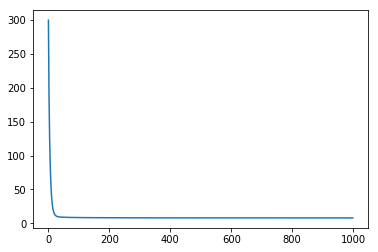

In [67]:
import matplotlib.pyplot as plt
plt.plot(costHistory)
plt.show()

In [70]:
def predict(x,m):
    prediction = x.dot(m)
    return prediction

In [74]:
col_names = testDf.columns
for c in col_names:
    testDf[str(c) + 'sq'] = testDf[c]**2

In [76]:
testDf.head()

,0,1,2,3,4,5,6,7,8,9,...,3sq,4sq,5sq,6sq,7sq,8sq,9sq,10sq,11sq,12sq
0,2.918166,-0.487722,1.015999,-0.272599,0.365444,-1.609343,1.117494,-1.048494,1.661245,1.530926,...,0.07431,0.133549,2.589986,1.248794,1.099341,2.759736,2.343736,0.650565,2.552170,1.083810
1,-0.403392,-0.487722,0.406098,-0.272599,-1.016689,0.560412,-1.332629,1.029344,-0.637962,-0.708183,...,0.07431,1.033656,0.314061,1.775900,1.059549,0.406995,0.501523,1.289012,0.194527,0.800556
2,-0.413178,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,...,0.07431,0.025003,0.055013,0.083482,0.513572,0.965980,0.645149,1.384072,0.194527,0.250851
3,-0.412649,0.413589,-0.802031,-0.272599,-0.999412,-0.408356,-1.677566,1.435452,-0.637962,-0.981390,...,0.07431,0.998825,0.166755,2.814229,2.060522,0.406995,0.963127,0.585924,0.194527,0.350420
4,-0.405882,-0.487722,-0.375976,-0.272599,-0.299707,-0.127698,-0.504068,-0.483566,-0.523001,-0.143951,...,0.07431,0.089825,0.016307,0.254084,0.233836,0.273531,0.020722,1.277419,0.162944,0.002365


In [77]:
test_data = testDf.values

In [78]:
#scaling the output
x_test = scaler.transform(test_data)
x_test.shape

(127, 26)

In [79]:
M = len(x_test)
coeff = np.array([[1] for i in range(M)])
XTEST = np.append(x_test,coeff,axis = 1)
XTEST.shape

(127, 27)

In [80]:
y_pred = predict(XTEST,m)
y_pred

array([13.09574997, 28.68298829, 22.1479805 , 23.80310465, 19.78794241,
       14.19657591, 28.26782634, 23.33941247, 18.60932573, 23.44938073,
       24.56139103, 16.66128822, 18.18478902, 19.08520835, 48.60760602,
       22.01611471, 25.10621145, 26.22662277, 17.34107827, 31.31325414,
       21.03932897, 23.98423786, 35.54000286, 35.47791981, 33.48434906,
       17.63750804, 23.21797397, 32.01368479, 22.90947125, 32.78910534,
       15.62854025, 26.24810133, 22.24758721, 23.27227076, 12.02074994,
       28.71045549, 25.12325078, 19.72256846, 22.59183972,  9.42273205,
       16.30752384, 26.78199631, 30.54905798, 19.30895519, 17.65525999,
       12.89428354, 47.15171559, 23.11037684, 31.81542357, 13.81877537,
       15.37996561, 41.87571054, 14.54043022, 19.76436667, 14.50520875,
       21.41849542, 15.57708688, 22.59828091, 14.180897  , 14.42809131,
        9.08523775, 28.6937219 , 23.61382739, 25.53597626, 16.32899708,
       15.84557757, 34.50389684, 15.37787826, 24.81224192, 21.53

In [81]:
np.savetxt("predictions.csv",y_pred, delimiter=",", fmt='%s')